# RIYA  VINUBHAI PATEL -653829

# ASSIGNMENT 1: CNN ON CHARACTERS

## INTRODUCTION

Convolutional Neural Net is a class of deep neural networks, most commonly applied to analyzing visual imagery. We will be using this to identify the numbers on the images. We will consider the value of the picture to be the nmber with the highest probability

### The Dataset

In this exercise we are going to use pictures of handwritten digits between 0 to 9 as our dataset. I have 30 images of the digits. We will also use Keras and Deep learning in this exercise. Reproducability is difficult since the libraries tend to parallilze floating point calculations.
Each time the calculations execute the execution is in a different order. 
Produce different results in each execution 

### Building the model network

Sequece of layers containing the neurons used to learn from the samples.
Each layer receives inputs, process it. (activate function) and produce results.

    1.  The more the layers you stack, the deeper the network-- deep learning.     
    2. Loss function-> produces ameasure of how well the network predicts the target values.The lower the value of the loss the better the predictions. 
    3. Optimizer minimizes the values produced by the loss function to tune the network to make bettter predictions.

### Loading the Dataset

In [4]:
import cv2
import numpy as np
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt

### Preprocessing real life image

Here comes the use of These are the steps for preprocessing the image:
Convert that image to greyscale
Binarize(threshold) the greyscaled image in such a way that only the digits in the image are white and rest is black
Using the binarized image, find contours in the image. Here, contours will provide us the individual digits in the image
Now, we have the digits. But we have to modify it further in such a way that it becomes a lot more similar to the images present in the training dataset.
Now, looking at an image in dataset. We can infer that the image has to be of shape (28, 28), it should contain the digit white colored and background black colored, and the digit in the image is not stretched to the boundaries, instead, around the digit, in each of the four sides, there is a 5 pixel region (padding) of black color. (You’’ll understand this fully if you check out any of the image from the dataset).
So, now for modifying our image, we’ll resize it to (18,18)
Then, we will add a padding of zeros (black color) of 5 pixels in each direction (top, bottom, left, right).
So, the final padded image will be of the size (5+18+5, 5+18+5) = (28, 28), which is what we wanted.

In [5]:
image = cv2.imread('/content/00.PNG')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)




----------------Contoured Image--------------------


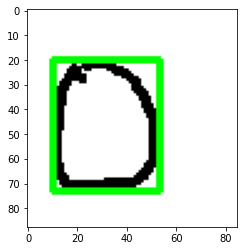

In [11]:
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
     # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)

### Let's Predict the number

So, I will be printing the output for each of the processed digits

In [14]:
model =Sequential()



---------------------------------------


=========PREDICTION============ 




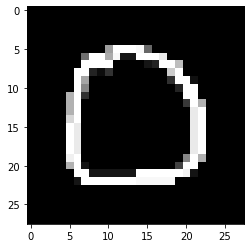

In [18]:
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))  
    
    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
  
    


In [5]:
import cv2
from sklearn.externals import joblib
from skimage.feature import hog
import numpy as np


# Read the input image 
im = cv2.imread("/content/2.PNG")

# Convert to grayscale and apply Gaussian filtering
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)

# Threshold the image
ret, im_th = cv2.threshold(im_gray, 90, 255, cv2.THRESH_BINARY_INV)

# Find contours in the image
ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

# For each rectangular region, calculate HOG features and predict
# the digit using Linear SVM.
for rect in rects:
    # Draw the rectangles
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    # Make the rectangular region around the digit
    leng = int(rect[3] * 1.6)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = im_th[pt1:pt1+leng, pt2:pt2+leng]
    # Resize the image
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3, 3))
   
  
cv2.imshow("Resulting Image with Rectangular ROIs", im)
cv2.waitKey()


DisabledFunctionError: ignored

In [6]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from PIL import Image
import numpy as np
import os




In [7]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train, y_train = load_images_to_data('1', 'data/minst_data/train/1', X_train, y_train)
X_test, y_test = load_images_to_data('1', 'data/minst_data/validation/1', X_test, y_test)